# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
os.chdir('/Users/josevans/Desktop/Springboard/Step 2')

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [3]:
df = pd.read_csv('step3_output_dfno2.csv')

df.drop(['state', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

X = df.drop(['Name','AdultWeekend'], axis=1)
y = df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X) 

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=3568)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(mae, evs)

5.230528444382495 0.8725299735572196


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [7]:
#NOTE IT TURNED OUT THE BIG MOUNTAIN RESORT WASN'T IN THE DOWNLOADED CSV FILE THAT IS LINKED TO IN THE SPRINGBOARD STEP 6.2, SO IN THE BELOW CODE I HAD TO ADD THE DATA FOR BIG MOUNTAIN FROM THE CSV WEBSITE
keys = df.columns
values = ['Big Mountain Resort', 6817,2353, 4464,0,0,0,3,2,6,0,3,14,105,4,3.3,3000,600,123,72,333,81,81,123,600, 2]
map_values = dict(zip(keys, values))
df = df.append(map_values, ignore_index=True)


,304,305,306,307,308
Name,Snow King Resort,Snowy Range Ski & Recreation Area,White Pine Ski Area,Big Mountain Resort,Big Mountain Resort
summit_elev,7808,9663,9500,6817,6817
vertical_drop,1571,990,1100,2353,2353
base_elev,6237,8798,8400,4464,4464
trams,0,0,0,0,0
fastEight,0,0,0,0,0
fastSixes,0,0,0,0,0
fastQuads,0,0,0,3,3
quad,1,0,0,2,2
triple,1,1,2,6,6


In [8]:
df = df[:-1]
df.tail().T

,303,304,305,306,307
Name,Sleeping Giant Ski Resort,Snow King Resort,Snowy Range Ski & Recreation Area,White Pine Ski Area,Big Mountain Resort
summit_elev,7428,7808,9663,9500,6817
vertical_drop,810,1571,990,1100,2353
base_elev,6619,6237,8798,8400,4464
trams,0,0,0,0,0
fastEight,0,0,0,0,0
fastSixes,0,0,0,0,0
fastQuads,0,0,0,0,3
quad,0,1,0,0,2
triple,1,1,1,2,6


In [4]:
df[df['Name'].str.contains('Big Mountain')]

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [45]:
BigMountain = df.iloc[-1].drop(['Name','AdultWeekend'])

BM_scaled = scaler.transform([BigMountain]) 



**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [46]:
BM_pred = model.predict(BM_scaled)
BM_pred

array([87.35405748])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [22]:
print ("The predicted Big Mountain Resort adult weekend price is ${:.2f}".format(BM_pred[0]))

The predicted Big Mountain Resort adult weekend price is $87.35


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

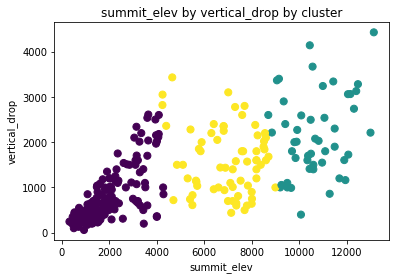

In [25]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

In [30]:
df.corr()['SkiableTerrain_ac'].sort_values(ascending=False)

SkiableTerrain_ac    1.000000
vertical_drop        0.774885
Runs                 0.749489
averageSnowfall      0.678834
summit_elev          0.648420
fastQuads            0.630639
LongestRun_mi        0.567145
base_elev            0.546015
clusters             0.500800
AdultWeekday         0.497437
daysOpenLastYear     0.455085
total_chairs         0.440153
trams                0.420016
AdultWeekend         0.419186
projectedDaysOpen    0.383952
Snow Making_ac       0.337875
fastSixes            0.301029
TerrainParks         0.238026
triple               0.217851
double               0.158177
NightSkiing_ac       0.148700
yearsOpen            0.118445
quad                 0.011340
surface             -0.036356
fastEight                 NaN
Name: SkiableTerrain_ac, dtype: float64

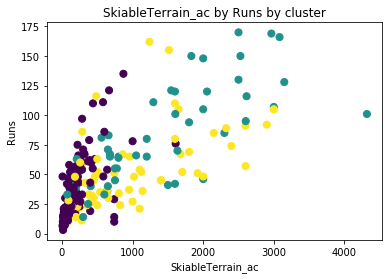

In [31]:
plt.scatter(df['SkiableTerrain_ac'], df['Runs'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Runs')
plt.title('SkiableTerrain_ac by Runs by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

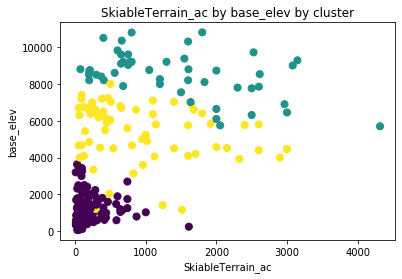

In [35]:
plt.scatter(df['SkiableTerrain_ac'], df['base_elev'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('base_elev')
plt.title('SkiableTerrain_ac by base_elev by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [36]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [39]:
column_names = df.columns[2:]
coeff_df = pd.DataFrame(abs(model.coef_), 
                        column_names, columns=['Coefficient'])  
coeff_df['MAE'] = mae
coeff_df['ExpVar'] = evs
coeff_df.to_csv('model_metrics.csv',index=False)

In [40]:
coeff_df

,Coefficient,MAE,ExpVar
vertical_drop,1.295153e+00,5.230528,0.87253
base_elev,2.666282e+00,5.230528,0.87253
trams,1.334332e-01,5.230528,0.87253
fastEight,5.963500e-01,5.230528,0.87253
fastSixes,4.440892e-15,5.230528,0.87253
fastQuads,4.910209e-01,5.230528,0.87253
quad,7.615937e-01,5.230528,0.87253
triple,6.292072e-01,5.230528,0.87253
double,8.068417e-01,5.230528,0.87253
surface,3.639340e-01,5.230528,0.87253


In [41]:
df.groupby('clusters').mean().sort_values('AdultWeekend')

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
clusters,,,,,,,,,,,,,,,,,,,,,
0,1831.057592,725.801047,1085.136126,0.047120,0.0,0.078534,0.392670,0.931937,1.329843,1.534031,...,1.022859,164.347663,112.612565,106.150481,55.343751,108.667440,50.693298,59.145896,111.662498,58.392670
2,6979.478261,1570.608696,5422.086957,0.130435,0.0,0.086957,0.797101,0.666667,1.434783,2.217391,...,1.730435,914.985507,111.666667,115.129500,62.623188,269.395891,59.480718,63.082146,123.616377,75.956522
1,10665.458333,2158.854167,8495.020833,0.395833,0.0,0.270833,2.208333,0.833333,1.958333,1.770833,...,2.206250,1420.500000,202.208333,136.321162,59.416667,305.506593,76.250072,77.729203,134.463855,15.625000
